In [4]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import os

## Loading the dataset

In [14]:
path = "../Data/Data_ECB_small.csv"

df = pd.read_csv(path)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                100000 non-null  int64  
 1   user_id                 100000 non-null  int64  
 2   order_number            100000 non-null  int64  
 3   order_dow               100000 non-null  int64  
 4   order_hour_of_day       100000 non-null  int64  
 5   days_since_prior_order  93451 non-null   float64
 6   product_id              100000 non-null  int64  
 7   add_to_cart_order       100000 non-null  int64  
 8   reordered               100000 non-null  int64  
 9   department_id           100000 non-null  int64  
 10  department              100000 non-null  object 
 11  product_name            100000 non-null  object 
dtypes: float64(1), int64(9), object(2)
memory usage: 9.2+ MB


In [16]:
df.isna().sum()

order_id                     0
user_id                      0
order_number                 0
order_dow                    0
order_hour_of_day            0
days_since_prior_order    6549
product_id                   0
add_to_cart_order            0
reordered                    0
department_id                0
department                   0
product_name                 0
dtype: int64

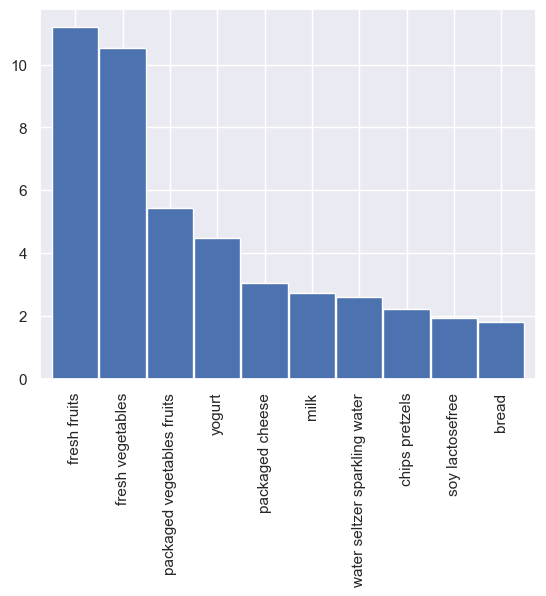

In [5]:
(df["product_name"].value_counts(normalize=True)*100)[:10].plot(kind="bar", width=0.98);

In [6]:
list_products = [element for innerlist in df["product_name"].str.split(" ").to_list() for element in innerlist]

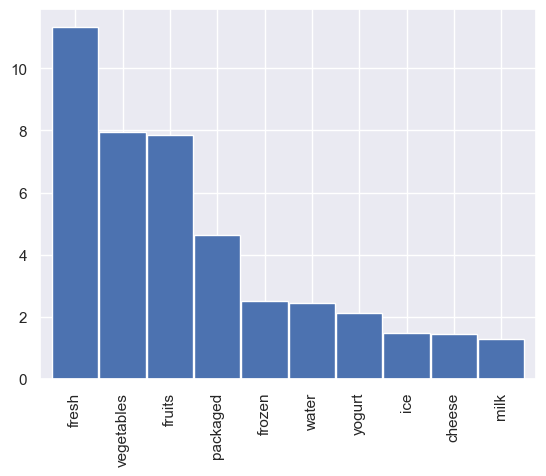

In [7]:
(pd.Series(list_products).value_counts(normalize=True)*100)[:10].plot(kind="bar", width=0.98);

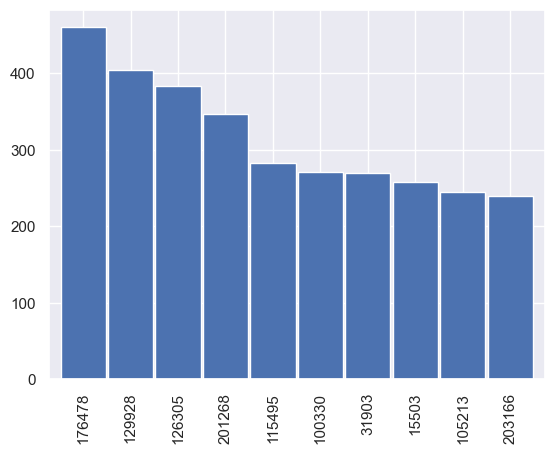

In [8]:
df["user_id"].value_counts()[:10].plot(kind="bar", width=0.95);

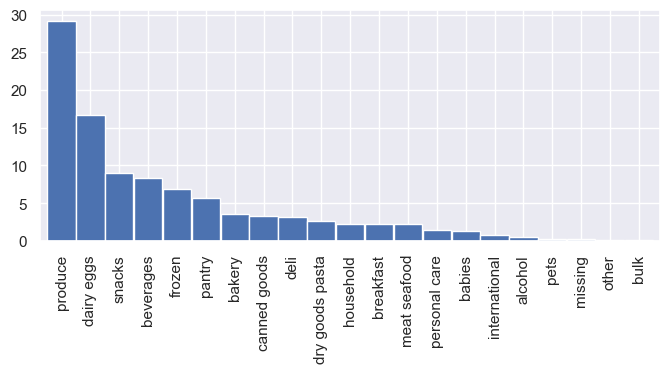

In [9]:
(100*df["department"].value_counts(normalize=True))\
    .plot(kind="bar", width=0.98, figsize=(8,3)
         );

/tmp/ipykernel_7483/4234879382.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(i*100)}%" for i in ax.get_yticks()]);


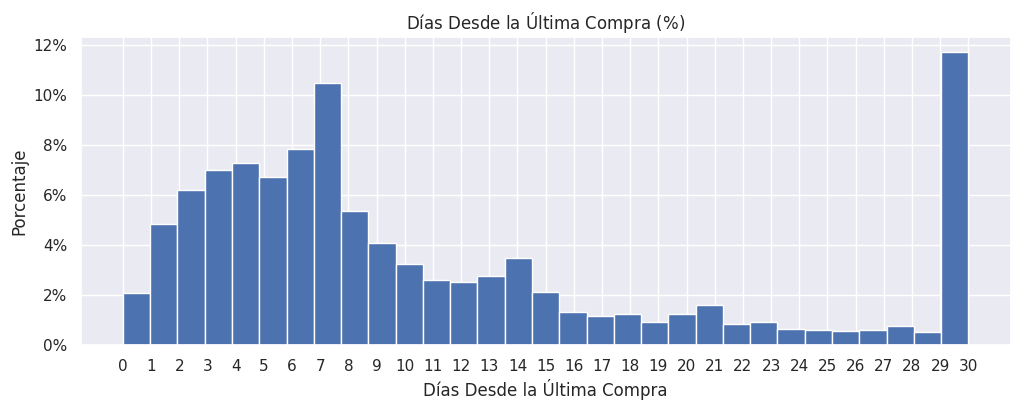

In [70]:
_, ax = plt.subplots()
ax = df[["order_id","user_id", "order_number" ,"days_since_prior_order"]].drop_duplicates()\
            ["days_since_prior_order"].dropna().plot(kind="hist", bins=31, figsize=(12,4), xticks=range(0,31),
                                                     title="Días Desde la Última Compra ($\%$)", ylabel="Porcentaje",
                                                     density=True, xlabel="Días Desde la Última Compra")
ax.set_yticklabels([f"{int(i*100)}%" for i in ax.get_yticks()]);

In [73]:
df_o = df[["order_id","user_id", "order_number" ,"days_since_prior_order"]].drop_duplicates()

In [83]:
df_o["Semanas"] = df_o["days_since_prior_order"].apply(lambda x: "<= 7 días" if x<=7 else "Entre 8 y 14 días" if (x >7 and x<=14) else "Entre 15 y 21 días" if (x >14 and x<=21) else ">= 21 días")

In [97]:
(df_o["Semanas"].value_counts(normalize=True)*100).reindex(["<= 7 días", "Entre 8 y 14 días", "Entre 15 y 21 días", ">= 21 días"])

Semanas
<= 7 días             47.472594
Entre 8 y 14 días     21.833130
Entre 15 y 21 días     8.719042
>= 21 días            21.975233
Name: proportion, dtype: float64

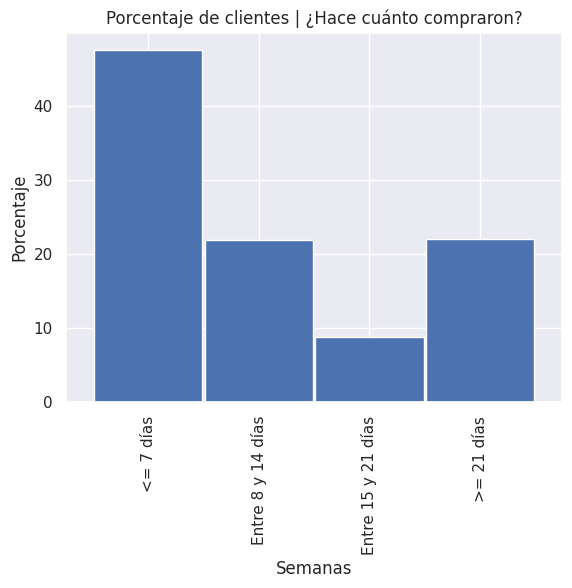

In [98]:
(df_o["Semanas"].value_counts(normalize=True)*100).reindex(["<= 7 días", "Entre 8 y 14 días", "Entre 15 y 21 días", ">= 21 días"])\
    .plot(kind="bar", width=0.98, ylabel="Porcentaje", title="Porcentaje de clientes | ¿Hace cuánto compraron?");

In [11]:
df["active_days"]= (df["days_since_prior_order"] == 7) | (df["days_since_prior_order"] == 30)

In [12]:
grouped = (df.groupby(["active_days","department"])["department"].count()/\
df.groupby(["active_days","department"])["department"].count().unstack().sum(axis=1)).sort_values(ascending=False).unstack(0)*100

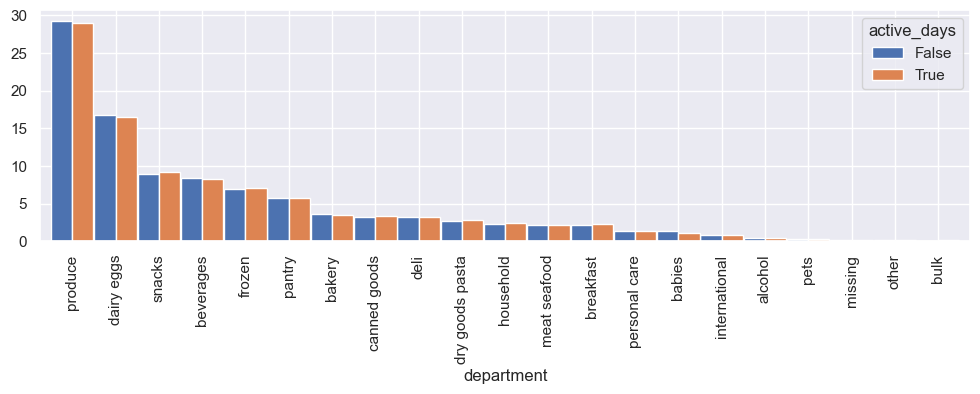

In [13]:
_, ax = plt.subplots(figsize=(12,3))
grouped.sort_values(by=False, ascending=False).plot(kind="bar", width=0.98, ax=ax);

In [14]:
df["days_7"] = df["days_since_prior_order"] == 7

In [15]:
df["days_30"] = df["days_since_prior_order"] == 30

In [16]:
grouped_7 = (100*df.groupby(["days_7","department"])["department"].count().get(True)/df.groupby(["days_7","department"])["department"].count().get(True).sum()).sort_values(ascending=False)
grouped_30 = (100*df.groupby(["days_30","department"])["department"].count().get(True)/df.groupby(["days_30","department"])["department"].count().get(True).sum()).sort_values(ascending=False)

In [17]:
df_730 = pd.DataFrame()
df_730["days_7"] = grouped_7
df_730["days_30"] = grouped_30

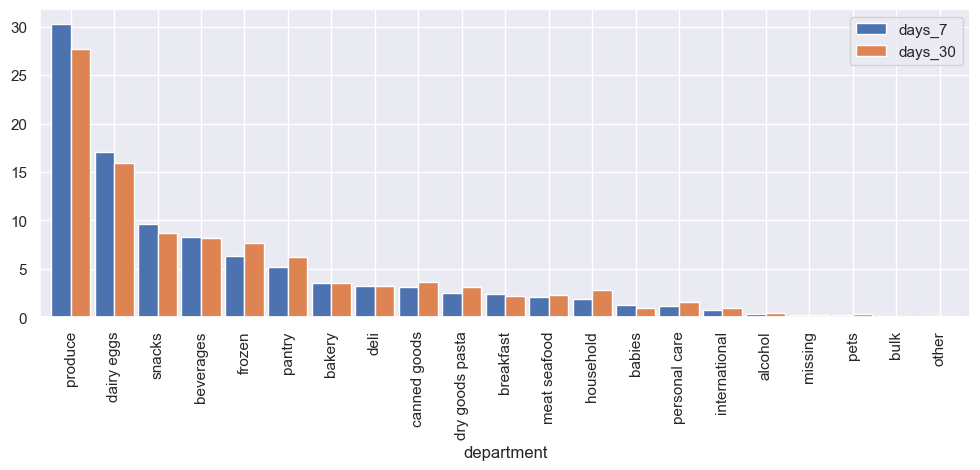

In [18]:
df_730.plot(kind="bar", width=0.9, figsize=(12,4));

In [19]:
df[df["user_id"] == 49125]["order_id"].unique()

array([2425083,  387526, 1366648, 2590080], dtype=int64)

In [20]:
df_user = df[df["user_id"] == 49125]
order_ids = df[df["user_id"] == 49125]["order_id"].unique()
df_user = df_user.replace(np.nan,0)

pd.Series([df_user[df_user["order_id"] == x]["days_since_prior_order"].iloc[0] for x in order_ids])

0     0.0
1     9.0
2    20.0
3    13.0
dtype: float64

In [21]:
user_id = pd.Series(df["user_id"].unique()).sample(1)

df_user = df[df["user_id"] == user_id.values[0]]
order_ids = df[df["user_id"] == user_id.values[0]]["order_id"].unique()
df_user = df_user.replace(np.nan,0)


list(pd.Series([df_user[df_user["order_id"] == x]["days_since_prior_order"].iloc[0] for x in order_ids]).cumsum())[-1]

0.0

In [22]:
order_ids = df[df["user_id"] == 162867]["order_id"].unique()

In [23]:
grouped_obj = (df.groupby(["user_id","order_id"])["days_since_prior_order"].sum()/df.groupby(["user_id","order_id"])["days_since_prior_order"].count())

In [24]:
grouped_obj[:8]

user_id  order_id
2        1501582     10.0
         1901567      3.0
3        444309       9.0
         521107      11.0
         2037211     20.0
7        121053      30.0
10       83395       14.0
11       2921164     30.0
Name: days_since_prior_order, dtype: float64

In [25]:
max_days_active = list(grouped_obj.reset_index().groupby("user_id")["days_since_prior_order"].sum().values)

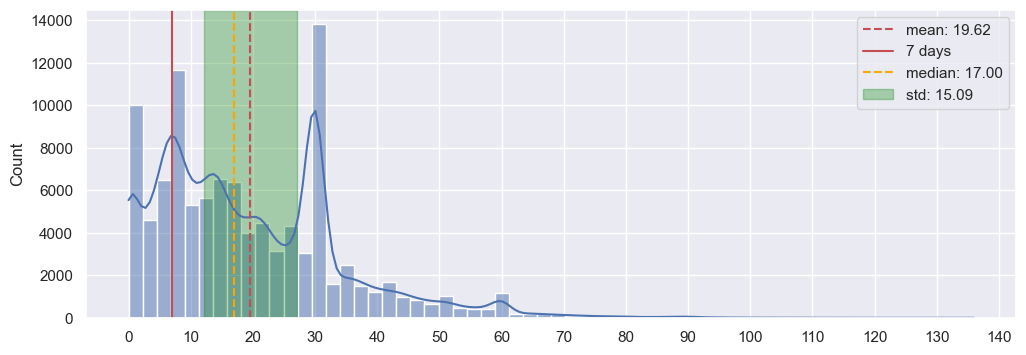

In [26]:
_, ax = plt.subplots(figsize=(12,4))
sns.histplot(max_days_active, bins=60, kde=True)
plt.xticks([10*x for x in range(15)])
ax.axvline(np.mean(max_days_active), ls="--", c="r", label=f"mean: {np.mean(max_days_active):.2f}")
ax.axvline(7, c="r", label=f"7 days")
ax.axvline(np.median(max_days_active), ls="--", c="orange", label=f"median: {np.median(max_days_active):.2f}")
ax.axvspan(np.mean(max_days_active)-0.5*np.std(max_days_active),np.mean(max_days_active)+0.5*np.std(max_days_active), color="green", alpha=0.3, label=f"std: {np.std(max_days_active):.2f}")
plt.legend();

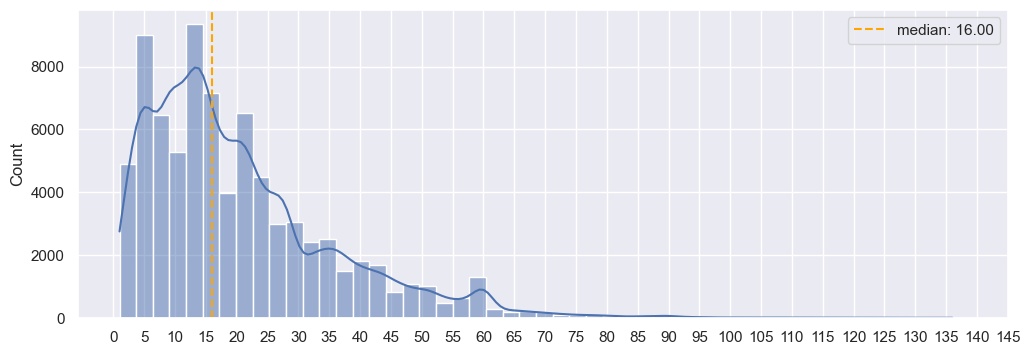

In [27]:
max_days_active_filtered = [x for x in max_days_active if x != 7 and x != 30 and x!= 0]

_, ax = plt.subplots(figsize=(12,4))
sns.histplot(max_days_active_filtered, bins=50, kde=True)
plt.xticks([5*x for x in range(30)])
#ax.axvline(np.mean(max_days_active_filtered), ls="--", c="r", label=f"mean: {np.mean(max_days_active_filtered):.2f}")
ax.axvline(np.median(max_days_active_filtered), ls="--", c="orange", label=f"median: {np.median(max_days_active_filtered):.2f}")
#ax.axvspan(np.mean(max_days_active_filtered)-0.5*np.std(max_days_active_filtered),np.mean(max_days_active_filtered)+0.5*np.std(max_days_active_filtered), color="green", alpha=0.3, label=f"std: {np.std(max_days_active_filtered):.2f}")
plt.legend();

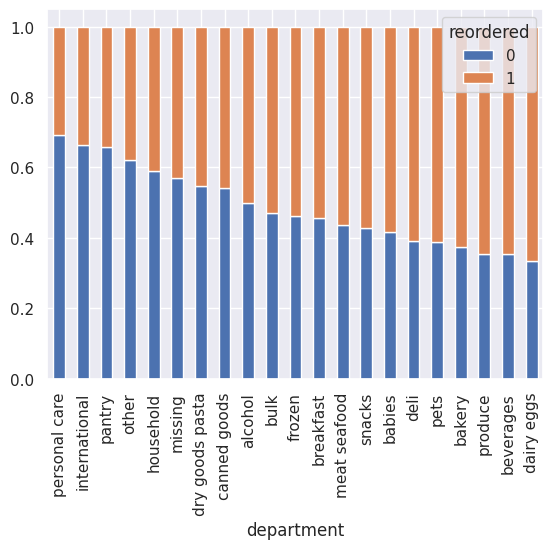

In [111]:
df.groupby("department")["reordered"].value_counts(normalize=True).unstack().sort_values(by=1).plot(kind="bar", stacked=True);

In [118]:
df_i = df[["order_id","user_id", "order_number" ,"days_since_prior_order", "order_dow"]].drop_duplicates()

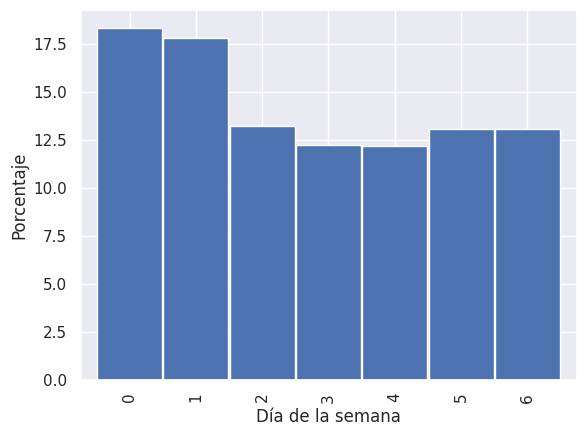

In [133]:
(df_i["order_dow"].value_counts(normalize=True)*100).sort_index().plot(kind="bar", ylabel="Porcentaje", xlabel="Día de la semana", width=0.98);

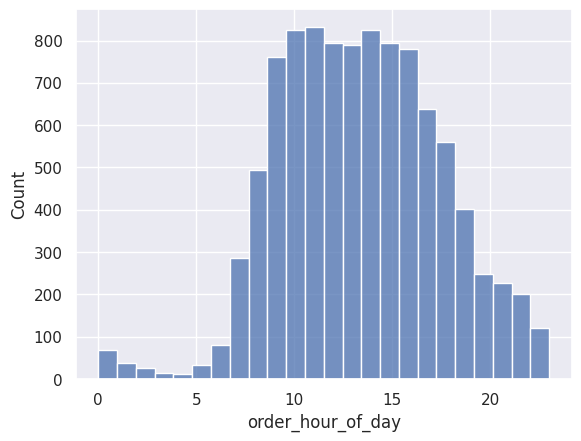

In [158]:
sns.histplot(data=df.iloc[df["order_id"].drop_duplicates().index], x="order_hour_of_day", bins=24);

In [161]:
df_r = df.iloc[df["order_id"].drop_duplicates().index]

In [174]:
bins = [-1, 6, 12, 18, 23]
labels = ["Madrugada", "Mañana", "Tarde", "Noche"]
df_r.loc[:,"turno"] = pd.cut(df_r["order_hour_of_day"], bins=bins, labels=labels)

In [179]:
df_r["order_hour_of_day"]

0        18
9        17
22       16
37       11
48       11
         ..
99973    15
99978    12
99988     9
99998    18
99999    20
Name: order_hour_of_day, Length: 9852, dtype: int64

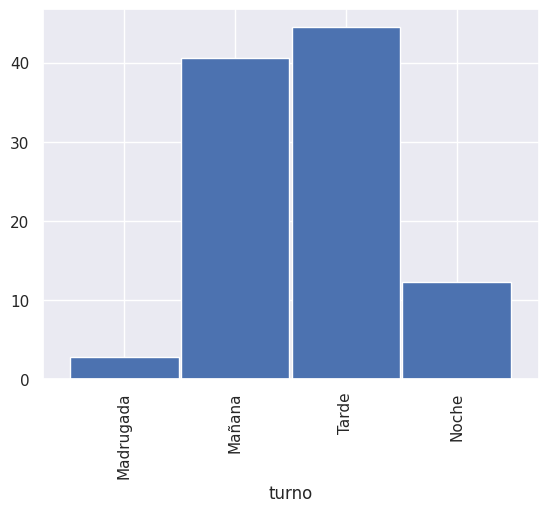

In [180]:
(df_r["turno"].value_counts(normalize=True)*100).reindex(["Madrugada", "Mañana", "Tarde", "Noche"]).plot(kind="bar", width=0.98);

In [183]:
bins = [-1, 6, 9, 12, 15, 18, 23]
labels = ["Madrugada", "Mañana - [6-9]", "Mañana - [9-12]", "Tarde - [12-3]", "Tarde - [3-6]", "Noche"]
df_r.loc[:,"turno"] = pd.cut(df_r["order_hour_of_day"], bins=bins, labels=labels)

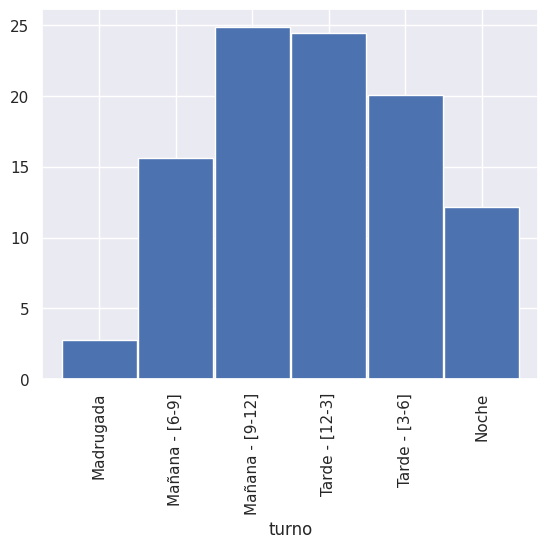

In [184]:
(df_r["turno"].value_counts(normalize=True)*100).reindex(labels).plot(kind="bar", width=0.98);

In [185]:
(df_r["turno"].value_counts(normalize=True)*100).reindex(labels)

turno
Madrugada           2.750711
Mañana - [6-9]     15.641494
Mañana - [9-12]    24.888348
Tarde - [12-3]     24.462038
Tarde - [3-6]      20.077142
Noche              12.180268
Name: proportion, dtype: float64

: 